In [182]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [183]:
df = pd.read_csv("age_gender.csv")

In [184]:
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [185]:
del df["img_name"]
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [186]:
df

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."
...,...,...,...,...
23700,99,0,1,"[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9..."
23701,99,1,1,"[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85...."
23702,99,2,1,"[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101..."
23703,99,2,1,"[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140...."


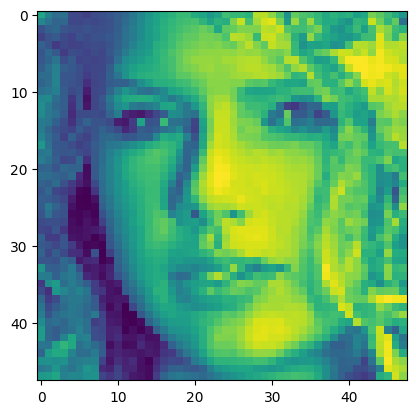

In [187]:
x = np.array(df['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)

plt.imshow(x[2000])

<Axes: xlabel='ethnicity', ylabel='Count'>

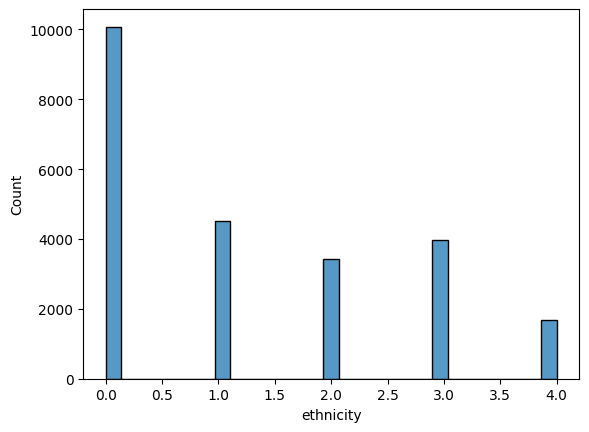

In [188]:
sns.histplot(data=df,x="ethnicity")


<Axes: xlabel='age', ylabel='Count'>

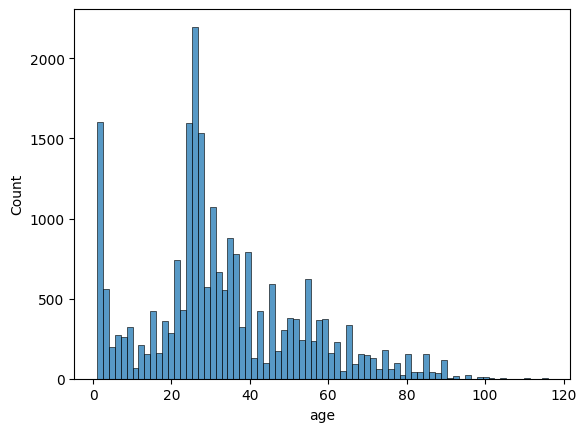

In [189]:
sns.histplot(data=df,x="age")


<Axes: xlabel='gender', ylabel='Count'>

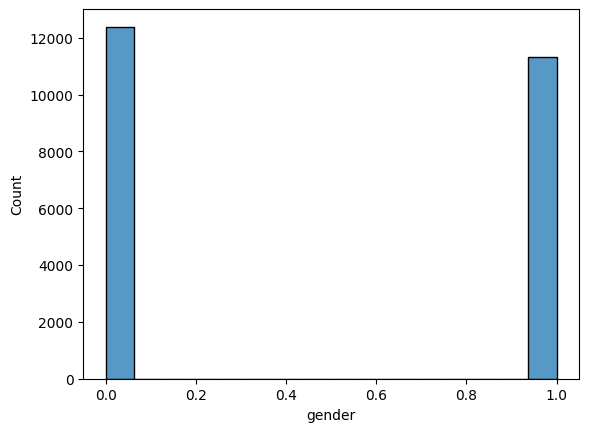

In [190]:
sns.histplot(data=df,x="gender")

In [191]:
df["pixels"]=df["pixels"]/255

***GENDER***

Let's try with a fully connected network to determine the gender

In [192]:
y = df['gender']

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [194]:
x_train[0]

array([[[146.],
        [150.],
        [147.],
        ...,
        [ 91.],
        [ 83.],
        [ 84.]],

       [[147.],
        [147.],
        [144.],
        ...,
        [ 88.],
        [ 85.],
        [ 83.]],

       [[139.],
        [129.],
        [133.],
        ...,
        [ 82.],
        [ 88.],
        [ 85.]],

       ...,

       [[115.],
        [111.],
        [106.],
        ...,
        [ 69.],
        [ 67.],
        [ 62.]],

       [[114.],
        [113.],
        [110.],
        ...,
        [ 64.],
        [ 64.],
        [ 58.]],

       [[113.],
        [118.],
        [112.],
        ...,
        [ 62.],
        [ 60.],
        [ 59.]]], dtype=float32)

In [195]:
y_train[0]

0

In [226]:
model_gender_1 = tf.keras.Sequential()
model_gender_1.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_1.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [227]:
epochs = 20
history_gender_1=model_gender_1.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 6s 6ms/step - loss: 3.6409 - accuracy: 0.6968 - val_loss: 0.6262 - val_accuracy: 0.7956
Epoch 2/20
593/593 [==============================] - 3s 5ms/step - loss: 0.5828 - accuracy: 0.7705 - val_loss: 0.4044 - val_accuracy: 0.8256
Epoch 3/20
593/593 [==============================] - 2s 4ms/step - loss: 0.4729 - accuracy: 0.7869 - val_loss: 0.4839 - val_accuracy: 0.7884
Epoch 4/20
593/593 [==============================] - 2s 4ms/step - loss: 0.6081 - accuracy: 0.7737 - val_loss: 0.5662 - val_accuracy: 0.7429
Epoch 5/20
593/593 [==============================] - 3s 4ms/step - loss: 0.7456 - accuracy: 0.7280 - val_loss: 0.5871 - val_accuracy: 0.5250
Epoch 6/20
593/593 [==============================] - 3s 4ms/step - loss: 0.6650 - accuracy: 0.5377 - val_loss: 0.6927 - val_accuracy: 0.5248
Epoch 7/20
593/593 [==============================] - 2s 4ms/step - loss: 0.6874 - accuracy: 0.5223 - val_loss: 0.6912 - val_accuracy: 0.5246
Epoch 

In [248]:
def plot_figs(epochs,hist):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    values = ["accuracy","loss"]
    for i in range(2):
        ax[i].plot(range(epochs),hist.history[values[i]],label=values[i])
        ax[i].plot(range(epochs),hist.history['val_'+values[i]],label='val_'+values[i])
        ax[i].set_ylabel(values[i])
        ax[i].set_xlabel("epochs")
        ax[i].set_title(values[i]+" evolution")
        ax[i].legend()
    plt.show()

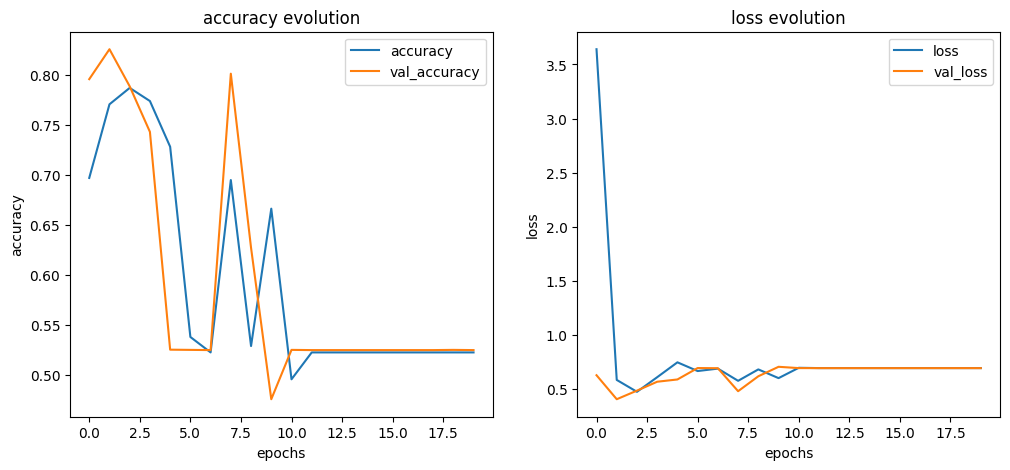

In [249]:
plot_figs(epochs,history_gender_1)

In [246]:
model_gender_2 = tf.keras.Sequential()
model_gender_2.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_2.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [247]:
history_gender_2=model_gender_2.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 5s 6ms/step - loss: 4.6169 - accuracy: 0.6699 - val_loss: 1.0123 - val_accuracy: 0.6996
Epoch 2/20
593/593 [==============================] - 3s 5ms/step - loss: 0.6590 - accuracy: 0.7594 - val_loss: 1.0443 - val_accuracy: 0.6132
Epoch 3/20
593/593 [==============================] - 3s 5ms/step - loss: 0.5425 - accuracy: 0.7805 - val_loss: 0.4832 - val_accuracy: 0.7922
Epoch 4/20
593/593 [==============================] - 4s 8ms/step - loss: 0.4422 - accuracy: 0.8052 - val_loss: 0.3878 - val_accuracy: 0.8256
Epoch 5/20
593/593 [==============================] - 3s 5ms/step - loss: 0.4477 - accuracy: 0.7999 - val_loss: 0.4128 - val_accuracy: 0.8321
Epoch 6/20
593/593 [==============================] - 3s 5ms/step - loss: 0.5889 - accuracy: 0.7657 - val_loss: 0.4879 - val_accuracy: 0.8157
Epoch 7/20
593/593 [==============================] - 3s 5ms/step - loss: 0.5635 - accuracy: 0.7203 - val_loss: 0.5302 - val_accuracy: 0.7463
Epoch 

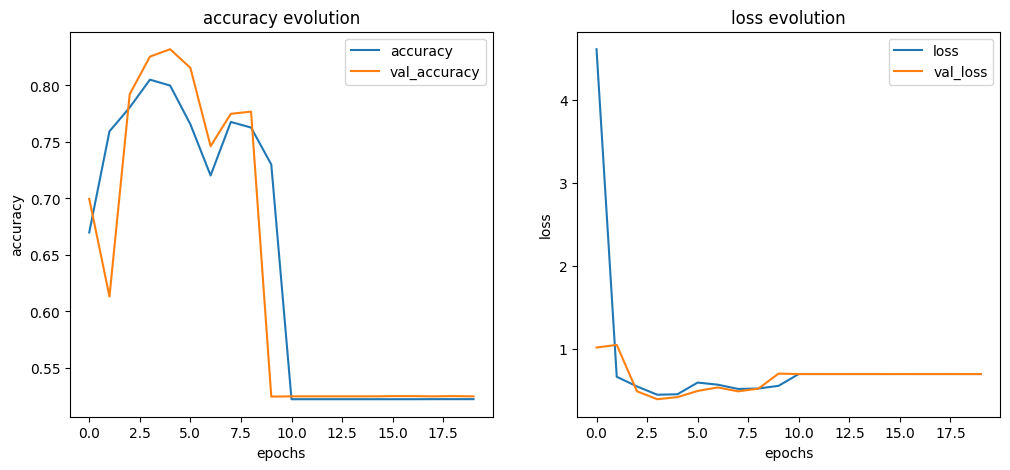

In [250]:
plot_figs(epochs,history_gender_2)

In [251]:
model_gender_3 = tf.keras.Sequential()
model_gender_3.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_3.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [252]:
history_gender_3=model_gender_3.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 17s 26ms/step - loss: 5.3044 - accuracy: 0.6863 - val_loss: 0.9136 - val_accuracy: 0.7015
Epoch 2/20
593/593 [==============================] - 10s 17ms/step - loss: 0.5332 - accuracy: 0.7809 - val_loss: 0.4052 - val_accuracy: 0.8180
Epoch 3/20
593/593 [==============================] - 10s 16ms/step - loss: 0.5058 - accuracy: 0.7820 - val_loss: 0.9294 - val_accuracy: 0.6617
Epoch 4/20
593/593 [==============================] - 10s 16ms/step - loss: 0.5380 - accuracy: 0.7773 - val_loss: 1.2249 - val_accuracy: 0.6305
Epoch 5/20
593/593 [==============================] - 10s 16ms/step - loss: 0.4845 - accuracy: 0.7900 - val_loss: 0.3772 - val_accuracy: 0.8319
Epoch 6/20
593/593 [==============================] - 10s 16ms/step - loss: 0.4460 - accuracy: 0.8029 - val_loss: 0.4673 - val_accuracy: 0.7726
Epoch 7/20
593/593 [==============================] - 10s 16ms/step - loss: 0.4328 - accuracy: 0.8042 - val_loss: 0.4013 - val_accuracy:

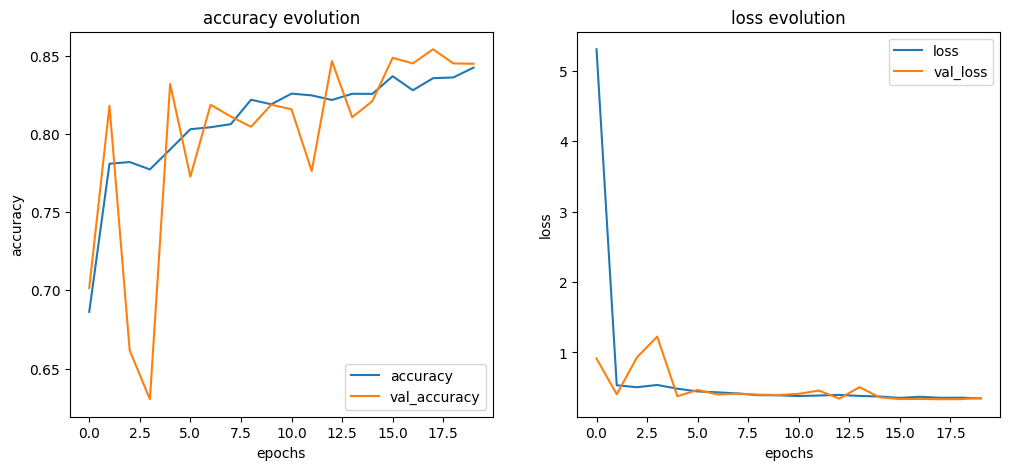

In [253]:
plot_figs(epochs,history_gender_3)

In [254]:
model_gender_4 = tf.keras.Sequential()
model_gender_4.add(tf.keras.layers.Flatten(input_shape=(48, 48)))
model_gender_4.add(tf.keras.layers.Dense(512,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(256,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(128,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(64,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(32,activation="relu"))
model_gender_4.add(tf.keras.layers.Dropout(0.5))
model_gender_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_gender_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [255]:
history_gender_4=model_gender_4.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 20s 27ms/step - loss: 20.3473 - accuracy: 0.5109 - val_loss: 0.6924 - val_accuracy: 0.5242
Epoch 2/20
593/593 [==============================] - 12s 20ms/step - loss: 0.7052 - accuracy: 0.5222 - val_loss: 0.6921 - val_accuracy: 0.5244
Epoch 3/20
593/593 [==============================] - 12s 20ms/step - loss: 0.6990 - accuracy: 0.5218 - val_loss: 0.6920 - val_accuracy: 0.5246
Epoch 4/20
593/593 [==============================] - 12s 20ms/step - loss: 0.6926 - accuracy: 0.5220 - val_loss: 0.6923 - val_accuracy: 0.5246
Epoch 5/20
593/593 [==============================] - 12s 20ms/step - loss: 0.6924 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5246
Epoch 6/20
593/593 [==============================] - 12s 20ms/step - loss: 0.6936 - accuracy: 0.5222 - val_loss: 0.6920 - val_accuracy: 0.5246
Epoch 7/20
593/593 [==============================] - 11s 19ms/step - loss: 0.6922 - accuracy: 0.5223 - val_loss: 0.6920 - val_accuracy

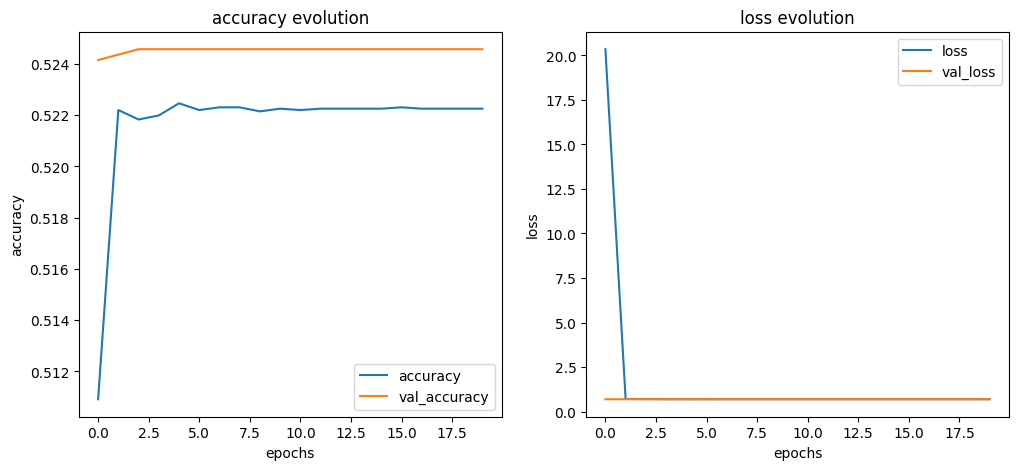

In [256]:
plot_figs(epochs,history_gender_4)

CNN network

In [257]:
model_gender_5 = tf.keras.Sequential()
model_gender_5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1))) 
model_gender_5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_gender_5.add(tf.keras.layers.Flatten())
model_gender_5.add(tf.keras.layers.Dense(64, activation='relu'))
model_gender_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [258]:
history_gender_5=model_gender_5.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 22s 32ms/step - loss: 2.0271 - accuracy: 0.7688 - val_loss: 0.5591 - val_accuracy: 0.7878
Epoch 2/20
593/593 [==============================] - 19s 31ms/step - loss: 0.3236 - accuracy: 0.8624 - val_loss: 0.2833 - val_accuracy: 0.8804
Epoch 3/20
593/593 [==============================] - 19s 32ms/step - loss: 0.2624 - accuracy: 0.8869 - val_loss: 0.3147 - val_accuracy: 0.8587
Epoch 4/20
593/593 [==============================] - 19s 33ms/step - loss: 0.2437 - accuracy: 0.8969 - val_loss: 0.2806 - val_accuracy: 0.8831
Epoch 5/20
593/593 [==============================] - 19s 32ms/step - loss: 0.2195 - accuracy: 0.9060 - val_loss: 0.3068 - val_accuracy: 0.8734
Epoch 6/20
593/593 [==============================] - 19s 33ms/step - loss: 0.2149 - accuracy: 0.9082 - val_loss: 0.3551 - val_accuracy: 0.8665
Epoch 7/20
593/593 [==============================] - 19s 32ms/step - loss: 0.2018 - accuracy: 0.9139 - val_loss: 0.3044 - val_accuracy:

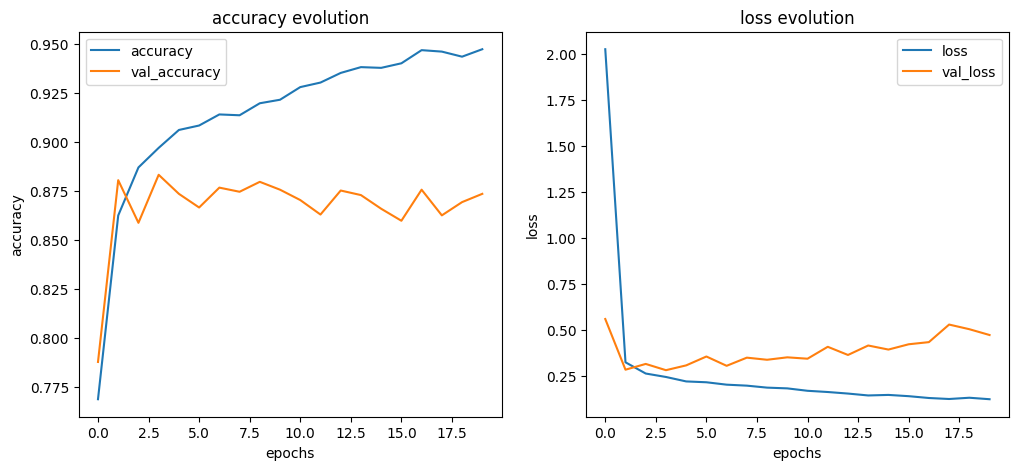

In [259]:
plot_figs(epochs,history_gender_5)

In [260]:
model_gender_6 = tf.keras.Sequential()
model_gender_6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_gender_6.add(tf.keras.layers.MaxPooling2D((2, 2))) 
model_gender_6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  
model_gender_6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_gender_6.add(tf.keras.layers.Flatten())
model_gender_6.add(tf.keras.layers.Dense(128, activation='relu'))
model_gender_6.add(tf.keras.layers.Dropout(0.5))
model_gender_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [261]:
history_gender_6=model_gender_6.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 39s 63ms/step - loss: 1.1111 - accuracy: 0.7243 - val_loss: 0.3666 - val_accuracy: 0.8435
Epoch 2/20
593/593 [==============================] - 38s 65ms/step - loss: 0.4013 - accuracy: 0.8086 - val_loss: 0.3172 - val_accuracy: 0.8564
Epoch 3/20
593/593 [==============================] - 38s 65ms/step - loss: 0.3777 - accuracy: 0.8214 - val_loss: 0.3613 - val_accuracy: 0.8224
Epoch 4/20
593/593 [==============================] - 38s 65ms/step - loss: 0.3498 - accuracy: 0.8357 - val_loss: 0.2919 - val_accuracy: 0.8553
Epoch 5/20
593/593 [==============================] - 39s 66ms/step - loss: 0.3345 - accuracy: 0.8462 - val_loss: 0.2887 - val_accuracy: 0.8608
Epoch 6/20
593/593 [==============================] - 40s 68ms/step - loss: 0.3210 - accuracy: 0.8532 - val_loss: 0.2858 - val_accuracy: 0.8635
Epoch 7/20
593/593 [==============================] - 39s 65ms/step - loss: 0.3071 - accuracy: 0.8580 - val_loss: 0.2757 - val_accuracy:

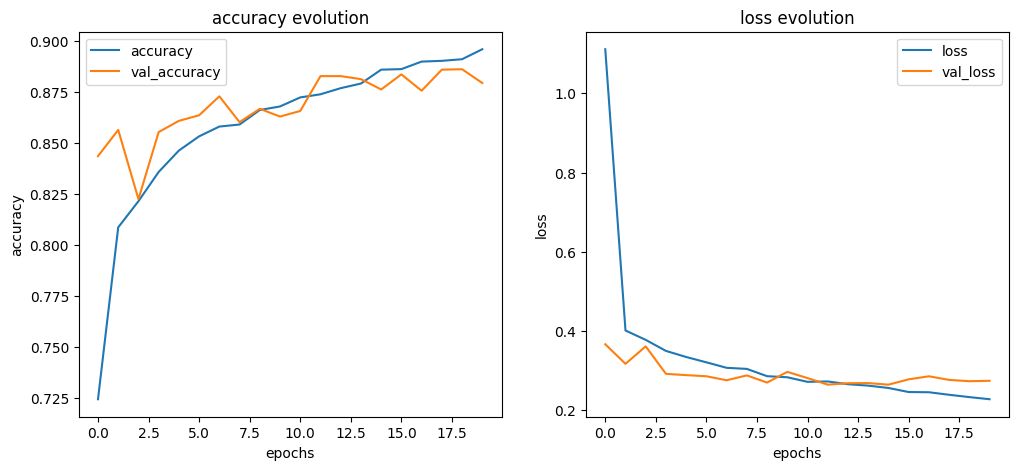

In [262]:
plot_figs(epochs,history_gender_6)

In [265]:
model_gender_7 = tf.keras.Sequential()
model_gender_7.add(tf.keras.layers.Conv2D(30, (5, 5), strides=(1, 1), activation='relu', input_shape=(48, 48, 1)))
model_gender_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
model_gender_7.add(tf.keras.layers.Conv2D(15, (3, 3), strides=(1, 1), activation='relu'))  
model_gender_7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_gender_7.add(tf.keras.layers.Dropout(0.3))
model_gender_7.add(tf.keras.layers.Flatten())
model_gender_7.add(tf.keras.layers.Dense(128, activation='relu'))
model_gender_7.add(tf.keras.layers.Dense(50, activation='relu'))
model_gender_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
model_gender_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [266]:
history_gender_7=model_gender_7.fit(x_train, y_train,batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/20
593/593 [==============================] - 43s 69ms/step - loss: 0.5924 - accuracy: 0.7316 - val_loss: 0.4085 - val_accuracy: 0.8102
Epoch 2/20
593/593 [==============================] - 42s 71ms/step - loss: 0.4480 - accuracy: 0.7900 - val_loss: 0.3841 - val_accuracy: 0.8241
Epoch 3/20
593/593 [==============================] - 42s 71ms/step - loss: 0.4069 - accuracy: 0.8111 - val_loss: 0.3476 - val_accuracy: 0.8422
Epoch 4/20
593/593 [==============================] - 40s 68ms/step - loss: 0.3771 - accuracy: 0.8281 - val_loss: 0.3206 - val_accuracy: 0.8521
Epoch 5/20
593/593 [==============================] - 41s 69ms/step - loss: 0.3512 - accuracy: 0.8419 - val_loss: 0.3340 - val_accuracy: 0.8515
Epoch 6/20
593/593 [==============================] - 40s 68ms/step - loss: 0.3337 - accuracy: 0.8512 - val_loss: 0.3058 - val_accuracy: 0.8677
Epoch 7/20
593/593 [==============================] - 41s 69ms/step - loss: 0.3260 - accuracy: 0.8534 - val_loss: 0.2980 - val_accuracy:

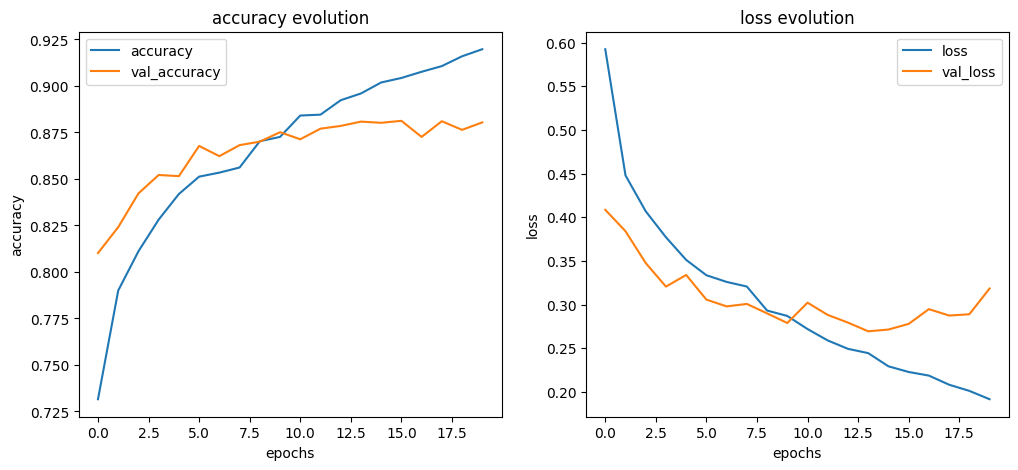

In [267]:
plot_figs(epochs,history_gender_7)